In [23]:
### Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

#from config import key_dict
#gkey= key_dict['KEY NAME GOES HERE']


#Import CSV file
edu_data = "Resources/edu_impact.csv"

edu_data_df = pd.read_csv(edu_data)

edu_data_df.head()

,Date,ISO,Country,Status,Value
0,16/02/2020,BGD,Bangladesh,Fully open,1
1,16/02/2020,BRA,Brazil,Fully open,1
2,16/02/2020,CHN,China,Partially open,2
3,16/02/2020,IDN,Indonesia,Fully open,1
4,16/02/2020,IND,India,Fully open,1


In [24]:
#Cleaning Data, dropping unnecessary columns

to_drop = ["ISO"]

edu_data_df.drop(to_drop, inplace= True, axis=1)

edu_data_df.head()

,Date,Country,Status,Value
0,16/02/2020,Bangladesh,Fully open,1
1,16/02/2020,Brazil,Fully open,1
2,16/02/2020,China,Partially open,2
3,16/02/2020,Indonesia,Fully open,1
4,16/02/2020,India,Fully open,1


In [25]:
#group the Dates and Status by country
#Gathering data on how many sample days in 2020 were closures for top 10 most populated countries


grouped_country_df = edu_data_df.groupby(["Country","Date","Status"])

print(grouped_country_df)

grouped_country_df.count().head(10)

Value
Country    Date      Status                       
Bangladesh 1/10/2020 Closed due to COVID-19      1
           1/11/2020 Closed due to COVID-19      1
           1/12/2020 Closed due to COVID-19      1
           1/3/2020  Fully open                  1
           1/4/2020  Closed due to COVID-19      1
           1/5/2020  Closed due to COVID-19      1
           1/6/2020  Academic break              1
           1/7/2020  Closed due to COVID-19      1
           1/8/2020  Closed due to COVID-19      1
           1/9/2020  Academic break              1

In [26]:
#Count of how many days each Country were closed for Education due to Covid-19 in 2020.

Status_count_df = edu_data_df[edu_data_df["Status"] =="Closed due to COVID-19"]

Count = Status_count_df.groupby(["Country"]).count()

Count

,Date,Status,Value
Country,,,
Bangladesh,241,241,241
Brazil,267,267,267
China,66,66,66
India,204,204,204
Indonesia,142,142,142
Mexico,228,228,228
Nigeria,125,125,125
Pakistan,153,153,153


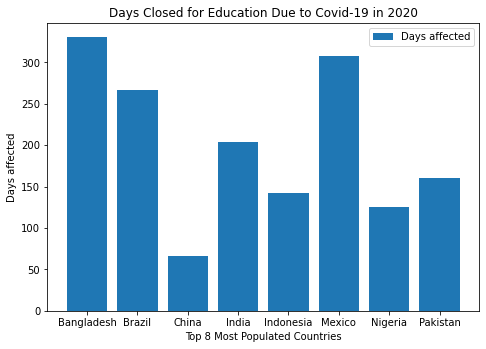

In [27]:
# Plot bar
fig = plt.figure()
width = 0.60
ax = fig.add_axes([0,0,1,1])
countries = ['Bangladesh', 'Brazil', 'China', 'India', 'Indonesia', 'Mexico', 'Nigeria', 'Pakistan']
days = [331,267,66,204,142,307,125,160,]
ax.bar(countries,days)
ax.set_ylabel('Days affected')
ax.set_xlabel('Top 8 Most Populated Countries')
ax.set_title('Days Closed for Education Due to Covid-19 in 2020')
ax.legend(labels=['Days affected', 'Country'])
plt.show()

In [28]:
#Create new cell so this does not rerun each time. # Run to reset edu-data_df2
edu_data_df2 = edu_data_df.copy()
edu_data_df2

,Date,Country,Status,Value
0,16/02/2020,Bangladesh,Fully open,1
1,16/02/2020,Brazil,Fully open,1
2,16/02/2020,China,Partially open,2
3,16/02/2020,Indonesia,Fully open,1
4,16/02/2020,India,Fully open,1
...,...,...,...,...
3195,31/12/2020,Mexico,Academic break,0
3196,31/12/2020,Nigeria,Academic break,0
3197,31/12/2020,Pakistan,Academic break,0
3198,31/12/2020,Russian Federation,Academic break,0


In [29]:
# Convert Date column to datetime
edu_data_df2["Date"] = pd.to_datetime(edu_data_df2["Date"], format="%d/%M/%Y")

In [30]:
# Check DF values
edu_data_df2.head()

,Date,Country,Status,Value
0,2020-01-16 00:02:00,Bangladesh,Fully open,1
1,2020-01-16 00:02:00,Brazil,Fully open,1
2,2020-01-16 00:02:00,China,Partially open,2
3,2020-01-16 00:02:00,Indonesia,Fully open,1
4,2020-01-16 00:02:00,India,Fully open,1


In [31]:
# Create axis variables
x_axis1 = edu_data_df2['Date']
y_axis1 = edu_data_df2['Status']

In [32]:
# Group by try 1
test_df = edu_data_df2.groupby(['Status','Date'])[['Value']].sum()
test_df

Value
Status         Date                      
Academic break 2020-01-01 00:04:00      0
               2020-01-01 00:06:00      0
               2020-01-01 00:07:00      0
               2020-01-01 00:08:00      0
               2020-01-01 00:09:00      0
...                                   ...
Partially open 2020-01-31 00:03:00      2
               2020-01-31 00:05:00      6
               2020-01-31 00:08:00      2
               2020-01-31 00:10:00      8
               2020-01-31 00:12:00      2

[914 rows x 1 columns]

In [33]:
# Group by try 2
test_df2 = edu_data_df2.groupby(['Country','Status'], as_index= False)[['Value']].sum()

In [34]:
# Check Dataframe2
test_df2

,Country,Status,Value
0,Bangladesh,Academic break,0
1,Bangladesh,Closed due to COVID-19,723
2,Bangladesh,Fully open,30
3,Brazil,Academic break,0
4,Brazil,Closed due to COVID-19,801
5,Brazil,Fully open,25
6,Brazil,Partially open,26
7,China,Academic break,0
8,China,Closed due to COVID-19,198
9,China,Fully open,83


In [35]:
# Create new 3rd DF without academic break values because they are 0.
test_df3 = test_df2[test_df2['Value'] > 0].reset_index(drop = True)

In [36]:
# Check 3rd dataframe
test_df3

,Country,Status,Value
0,Bangladesh,Closed due to COVID-19,723
1,Bangladesh,Fully open,30
2,Brazil,Closed due to COVID-19,801
3,Brazil,Fully open,25
4,Brazil,Partially open,26
5,China,Closed due to COVID-19,198
6,China,Fully open,83
7,China,Partially open,218
8,India,Closed due to COVID-19,612
9,India,Fully open,17


In [37]:
# Group by only Status and Value
test_df4 = test_df3.groupby(['Status'], as_index=False)[['Value']].sum()
test_df4

,Status,Value
0,Closed due to COVID-19,4278
1,Fully open,529
2,Partially open,1474


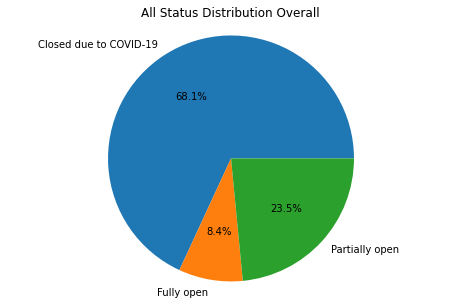

In [38]:
# Creating Sum total of disruption levels to Educational organizations globally.

fig1, ax1 = plt.subplots(figsize=(8, 5))
my_data = test_df4['Value']
my_labels = test_df4['Status']
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
plt.title('All Status Distribution Overall')
plt.axis('equal')
plt.show()